<a href="https://colab.research.google.com/github/tjrgh822/class_itsystem/blob/master/hw3/original_data100%2Baugmentedd_data100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from __future__ import print_function
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


(x_train, y_train), (x_test, y_test) = mnist.load_data()


datagen = ImageDataGenerator( width_shift_range=3, 
                             height_shift_range=3, 
                             horizontal_flip=True, 
                             vertical_flip=True,
                             brightness_range = [0.2, 1.0],
                             rotation_range = 90,
                             zoom_range = [0.5, 1.0]
                             )
                             

nodatagen = ImageDataGenerator()



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x_train = np.load("/content/drive/My Drive/colab/shuffledata_x+-45hard.npy")
y_train = np.load("/content/drive/My Drive/colab/shuffledata_y+-45hard.npy")
y_train[0:10]

array([[5.],
       [0.],
       [4.],
       [1.],
       [9.],
       [2.],
       [1.],
       [3.],
       [1.],
       [4.]], dtype=float32)

In [0]:
argu= datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size = x_test.shape[0], shuffle=False)

argu_y_test = argu[0][1]
argu_x_test = argu[0][0].reshape(-1, 28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
argu_y_test = keras.utils.to_categorical(argu_y_test,10)


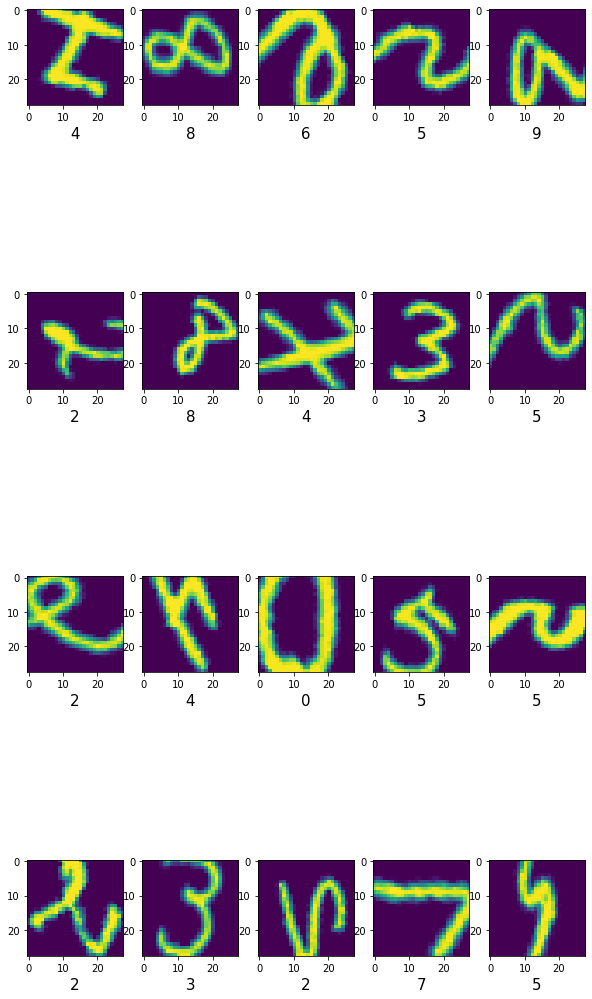

In [0]:
plt.figure(figsize=(10, 20))

for i, x in enumerate(np.random.randint(0, 10000, 20)):
  plt.subplot(4, 5, i+1)
  plt.xlabel(np.argmax(argu_y_test[x], axis=0), fontsize= 15)
  plt.imshow(argu_x_test[x].reshape(28, 28).astype(np.uint8))
plt.show()


In [0]:
#argu_y_test = np.argmax(argu_y_test, axis=1).reshape(-1, 1)
print(f"{x_train.shape}, {y_train.shape}\n{argu_x_test.shape}, {argu_y_test.shape}")

(90000, 28, 28, 1), (90000, 10)
(10000, 28, 28, 1), (10000, 10)


In [0]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    argu_x_test = argu_x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    argu_x_test = argu_x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)





model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), padding="valid", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 2048, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# 3rd Fully Connected Layer
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation = "softmax")) #As we have two classes

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 256)         1

In [0]:

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, LearningRateScheduler

hist_hist = []
for LR in range(10):
  def scheduler(epoch):
    if epoch < 10:
      return 0.0001*(1+LR)
    else:
      return 0.0001*(1+LR) * tf.math.exp(0.1 * (10 - epoch)/1.4)

  Lschedule = LearningRateScheduler(scheduler)

  batch_size = 100
  epochs = 15

  checkpointer = ModelCheckpoint(
      filepath='model_8.h5',
      save_best_only=True
  )
  early_stopping = EarlyStopping(patience=2)

  callbacks=[checkpointer, early_stopping, Lschedule]

  print(f"================ {LR} ===================")
  hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
            steps_per_epoch = x_train.shape[0]/ batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(argu_x_test, argu_y_test),
            validation_steps = argu_x_test.shape[0],
            callbacks= callbacks
            )
  hist_hist.append(hist)

#score = model.evaluate(x_test, y_test, verbose=0)

================ 0 ===================
Epoch 1/15
900/900 [==============================] - 65s 73ms/step - loss: 1.8991 - accuracy: 0.3714 - val_loss: 1.3534 - val_accuracy: 0.5190 - lr: 1.0000e-04
Epoch 2/15
900/900 [==============================] - 64s 71ms/step - loss: 1.6265 - accuracy: 0.4498 - val_loss: 1.0732 - val_accuracy: 0.6410 - lr: 1.0000e-04
Epoch 3/15
900/900 [==============================] - 63s 70ms/step - loss: 1.4499 - accuracy: 0.5087 - val_loss: 0.9454 - val_accuracy: 0.6818 - lr: 1.0000e-04
Epoch 4/15
900/900 [==============================] - 63s 70ms/step - loss: 1.3288 - accuracy: 0.5523 - val_loss: 0.7943 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 5/15
900/900 [==============================] - 62s 69ms/step - loss: 1.2262 - accuracy: 0.5874 - val_loss: 0.7209 - val_accuracy: 0.7584 - lr: 1.0000e-04
Epoch 6/15
900/900 [==============================] - 62s 69ms/step - loss: 1.1505 - accuracy: 0.6148 - val_loss: 0.6837 - val_accuracy: 0.7706 - lr: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'low_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


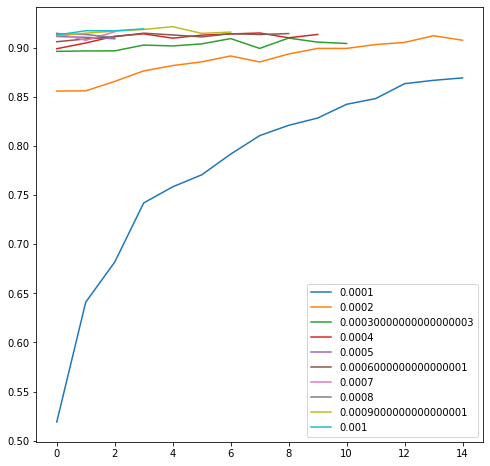

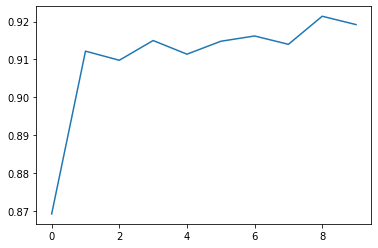

In [0]:
max_accuracy = []
for i in range(10):
  max_accuracy.append(max(hist_hist[i].history['val_accuracy']))

np.save('/content/drive/My Drive/colab/valacc_dataset2.npy', max_accuracy)

plt.figure(figsize=(8, 8))
for i in range(len(hist_hist)):
  plt.plot(hist_hist[i].history['val_accuracy'], label = f'{(i+1)*(0.0001)}')
plt.legend(loc = 'low_right')
plt.show()

plt.figure()
plt.plot(max_accuracy)
plt.show()

In [0]:
from keras.models import load_model

model.save('model_8.h5')

from google.colab import files
files.download('model_8.h5')

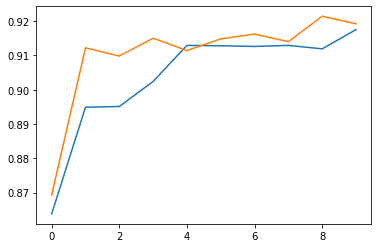

In [0]:
data1_hist = np.load('/content/drive/My Drive/colab/valacc_dataset1.npy')
data2_hist = np.load('/content/drive/My Drive/colab/valacc_dataset2.npy')

plt.figure()
plt.plot(data1_hist, label='data1')
plt.plot(data2_hist, label= 'data2')
plt.show()